<a href="https://colab.research.google.com/github/ecrinyetim/classification/blob/main/siniflandirma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas numpy scikit-learn matplotlib seaborn

In [ ]:
import psutil
import platform

print("--- COLAB DONANIM BİLGİLERİ ---")
print(f"İşletim Sistemi: {platform.system()} {platform.release()}")
print(f"İşlemci (CPU): {platform.processor()}")
print(f"Çekirdek Sayısı (Fiziksel): {psutil.cpu_count(logical=False)}")
print(f"Çekirdek Sayısı (Toplam): {psutil.cpu_count(logical=True)}")
print(f"Toplam RAM: {psutil.virtual_memory().total / (1024**3):.2f} GB")

--- COLAB DONANIM BİLGİLERİ ---
İşletim Sistemi: Linux 6.6.105+
İşlemci (CPU): x86_64
Çekirdek Sayısı (Fiziksel): 1
Çekirdek Sayısı (Toplam): 2
Toplam RAM: 12.67 GB


In [ ]:
import kagglehub
import pandas as pd
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

path = kagglehub.dataset_download("aaronisomaisom3/canine-wellness-dataset-synthetic-10k-samples")

print("Path to dataset files:", path)
file_path = os.path.join(path, "synthetic_dog_breed_health_data.csv")
df = pd.read_csv(file_path)

Using Colab cache for faster access to the 'canine-wellness-dataset-synthetic-10k-samples' dataset.
Path to dataset files: /kaggle/input/canine-wellness-dataset-synthetic-10k-samples


In [ ]:
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           10000 non-null  int64  
 1   Breed                        9710 non-null   object 
 2   Breed Size                   9712 non-null   object 
 3   Sex                          9675 non-null   object 
 4   Age                          9709 non-null   float64
 5   Weight (lbs)                 9709 non-null   float64
 6   Spay/Neuter Status           6433 non-null   object 
 7   Daily Activity Level         7770 non-null   object 
 8   Diet                         9698 non-null   object 
 9   Food Brand                   9700 non-null   object 
 10  Daily Walk Distance (miles)  9706 non-null   float64
 11  Other Pets in Household      9702 non-null   object 
 12  Medications                  9751 non-null   object 
 13  Seizures         

,ID,Breed,Breed Size,Sex,Age,Weight (lbs),Spay/Neuter Status,Daily Activity Level,Diet,Food Brand,...,Other Pets in Household,Medications,Seizures,Hours of Sleep,Play Time (hrs),Owner Activity Level,Annual Vet Visits,Average Temperature (F),Synthetic,Healthy
count,10000.00000,9710,9712,9675,9709.000000,9709.000000,6433,7770,9698,9700,...,9702,9751,9699,9721.000000,9691.000000,7773,9694.000000,9655.000000,9690,9678
unique,NaN,15,3,2,NaN,NaN,2,4,4,9,...,2,2,2,NaN,NaN,4,NaN,NaN,1,2
top,NaN,Bulldog,Large,Male,NaN,NaN,Spayed,Active,Wet food,Special,...,No,No,No,NaN,NaN,Very Active,NaN,NaN,Yes,Yes
freq,NaN,685,3824,4890,NaN,NaN,3222,1961,2501,2484,...,4922,4938,9214,NaN,NaN,1993,NaN,NaN,9690,7178
mean,5000.50000,NaN,NaN,NaN,7.063858,50.202493,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,11.006995,1.524095,NaN,1.474727,64.559606,NaN,NaN
std,2886.89568,NaN,NaN,NaN,3.751616,14.900010,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.463321,0.979939,NaN,1.152881,14.824669,NaN,NaN
min,1.00000,NaN,NaN,NaN,1.000000,10.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,8.000000,0.000000,NaN,0.000000,30.000000,NaN,NaN
25%,2500.75000,NaN,NaN,NaN,4.000000,40.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,10.000000,1.000000,NaN,1.000000,54.000000,NaN,NaN
50%,5000.50000,NaN,NaN,NaN,7.000000,50.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,11.000000,2.000000,NaN,1.000000,64.000000,NaN,NaN
75%,7500.25000,NaN,NaN,NaN,10.000000,60.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,12.000000,2.000000,NaN,2.000000,75.000000,NaN,NaN


In [ ]:
df.isnull().sum()

,0
ID,0
Breed,290
Breed Size,288
Sex,325
Age,291
Weight (lbs),291
Spay/Neuter Status,3567
Daily Activity Level,2230
Diet,302
Food Brand,300


In [ ]:
#ID sütunu modelimizin hedef değişkeniyle alakasız olduğu için veri setimizde gerekli olmayan bir attribute
df.drop('ID', axis=1, inplace=True)

In [ ]:
print(df['Synthetic'].value_counts(dropna=False))
#Modelimiz için bu attribute anlamsız olur çünkü sadece NaN'lar ve Yes değerlerinden oluşuyor.

Synthetic
Yes    9690
NaN     310
Name: count, dtype: int64


In [ ]:
print(f"\nÖnceki satır sayısı: {len(df)}")
df.dropna(subset=['Healthy'], inplace=True)
print(f"Healhtyli değeri olmayan satırlar silindikten sonra: {len(df)}")
print("\nSon Healthy dağılımı:")
print(df["Healthy"].value_counts())


Önceki satır sayısı: 10000
Healhtyli değeri olmayan satırlar silindikten sonra: 9678

Son Healthy dağılımı:
Healthy
Yes    7178
No     2500
Name: count, dtype: int64


In [ ]:
X = df.drop(["Healthy", "Synthetic"], axis=1)
y = df["Healthy"]

sayisal_features = X.select_dtypes(include=["int64", "float64"]).columns
kategorik_features = X.select_dtypes(include=['object']).columns

print(f"\n'Healthy', ve 'Synthetic' sütunları çıkarıldı.")
print("Sayısal Sütunlar:", list(sayisal_features))
print("Kategorik Sütunlar:", list(kategorik_features))


'Healthy', ve 'Synthetic' sütunları çıkarıldı.
Sayısal Sütunlar: ['Age', 'Weight (lbs)', 'Daily Walk Distance (miles)', 'Hours of Sleep', 'Play Time (hrs)', 'Annual Vet Visits', 'Average Temperature (F)']
Kategorik Sütunlar: ['Breed', 'Breed Size', 'Sex', 'Spay/Neuter Status', 'Daily Activity Level', 'Diet', 'Food Brand', 'Other Pets in Household', 'Medications', 'Seizures', 'Owner Activity Level']


In [ ]:
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp
)

print(f"Toplam veri sayısı: {len(df)}")
print(f"Train seti: {len(X_train)}")
print(f"Validation seti: {len(X_val)}")
print(f"Test seti: {len(X_test)}")

Toplam veri sayısı: 9678
Train seti: 5806
Validation seti: 1936
Test seti: 1936


In [ ]:
sayisal_medyan = X_train[sayisal_features].median()
kategorik_mod = X_train[kategorik_features].mode().iloc[0]

print("Kullanılacak medyan değerleri:\n", sayisal_medyan)
print("")
print("Kullanılacak mod değerleri:\n", kategorik_mod)

X_train[sayisal_features] = X_train[sayisal_features].fillna(sayisal_medyan)
X_val[sayisal_features] = X_val[sayisal_features].fillna(sayisal_medyan)
X_test[sayisal_features] = X_test[sayisal_features].fillna(sayisal_medyan)

X_train[kategorik_features] = X_train[kategorik_features].fillna(kategorik_mod)
X_val[kategorik_features] = X_val[kategorik_features].fillna(kategorik_mod)
X_test[kategorik_features] = X_test[kategorik_features].fillna(kategorik_mod)

print("\nDoldurma işlemi tamamlandı. X_train'de kalan boş veri:", X_train.isnull().sum().sum())

Kullanılacak medyan değerleri:
 Age                             7.0
Weight (lbs)                   50.0
Daily Walk Distance (miles)     3.0
Hours of Sleep                 11.0
Play Time (hrs)                 2.0
Annual Vet Visits               1.0
Average Temperature (F)        64.0
dtype: float64

Kullanılacak mod değerleri:
 Breed                          Bulldog
Breed Size                       Large
Sex                             Female
Spay/Neuter Status            Neutered
Daily Activity Level            Active
Diet                       Home cooked
Food Brand                     Special
Other Pets in Household             No
Medications                         No
Seizures                            No
Owner Activity Level       Very Active
Name: 0, dtype: object

Doldurma işlemi tamamlandı. X_train'de kalan boş veri: 0


--- İŞLEM ÖNCESİ AYKIRI DEĞER SAYILARI ---
Age                 : 0
Weight (lbs)        : 19
Daily Walk Distance (miles): 1016
Hours of Sleep      : 0
Play Time (hrs)     : 130
Annual Vet Visits   : 344
Average Temperature (F): 0

✅ Aykırı değerler baskılandı (Capped).
----------------------------------------
--- İŞLEM SONRASI AYKIRI DEĞER SAYILARI ---
Age                 : 0
Weight (lbs)        : 0
Daily Walk Distance (miles): 0
Hours of Sleep      : 0
Play Time (hrs)     : 0
Annual Vet Visits   : 0
Average Temperature (F): 0

📊 DEĞİŞİM GRAFİKLERİ ÇİZİLİYOR...


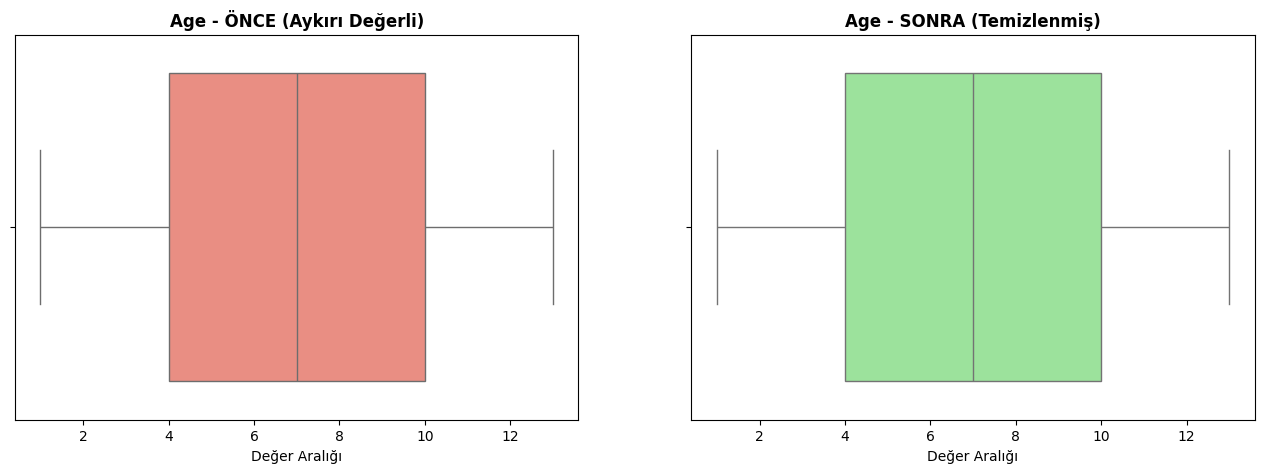

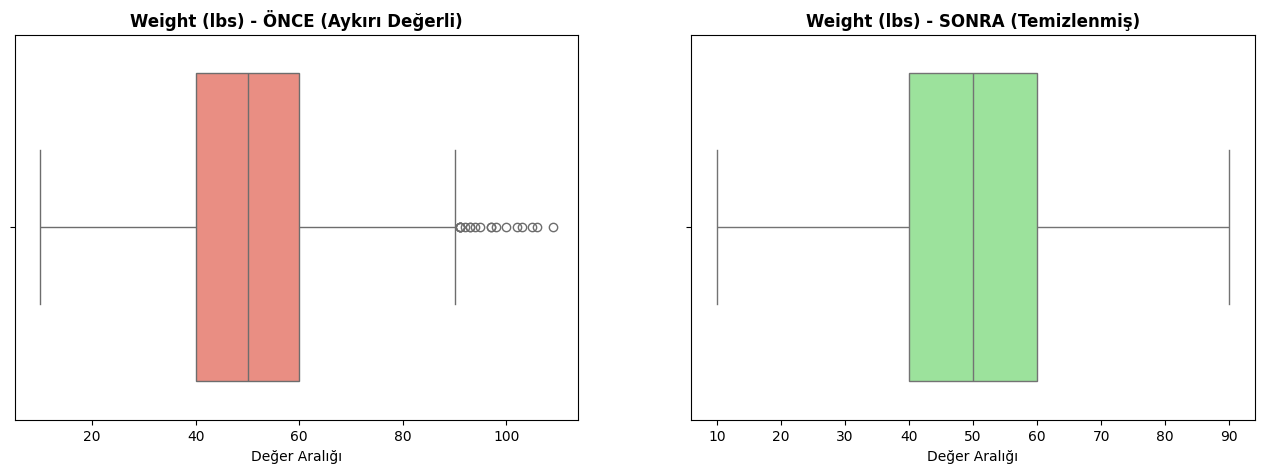

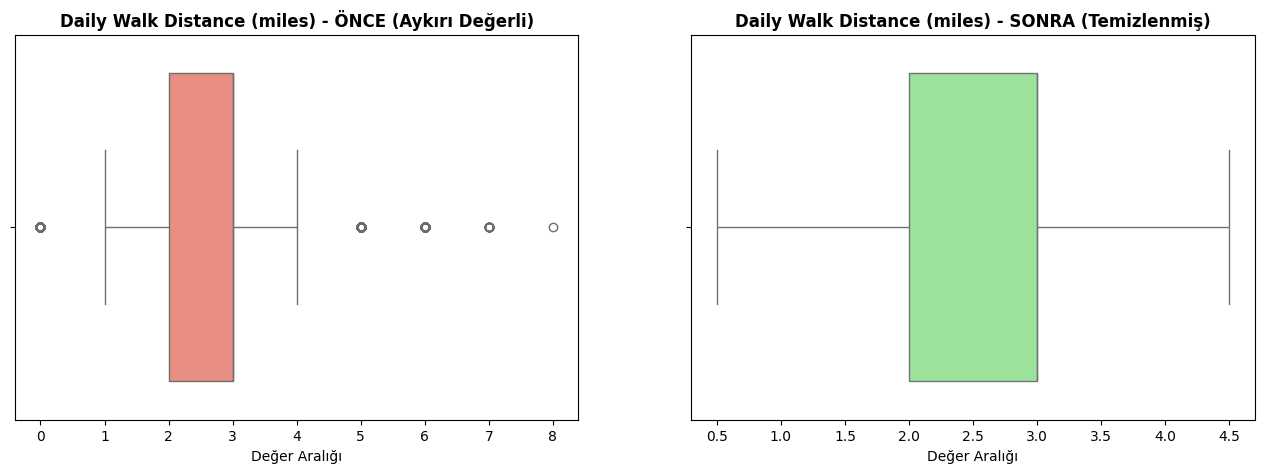

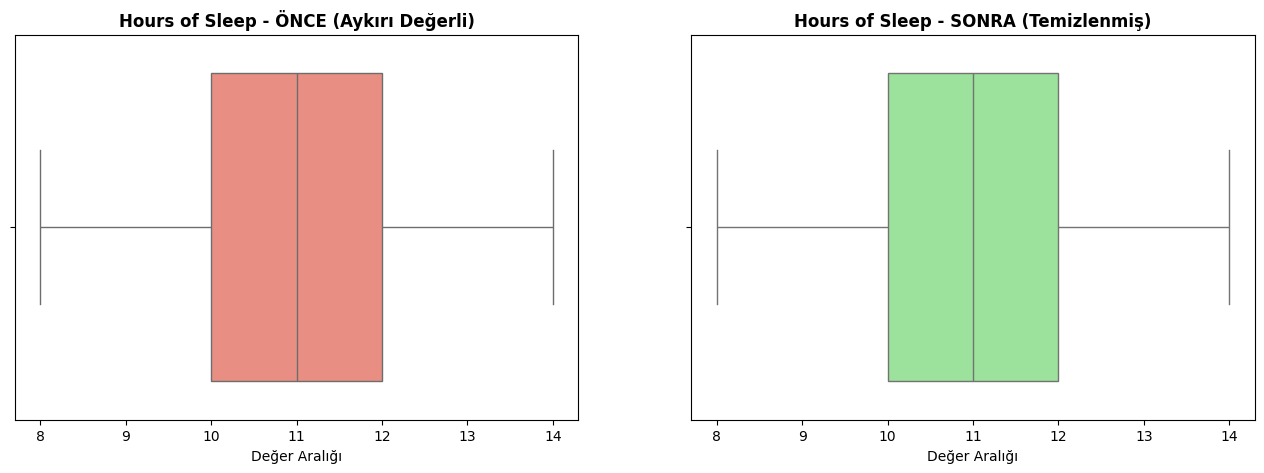

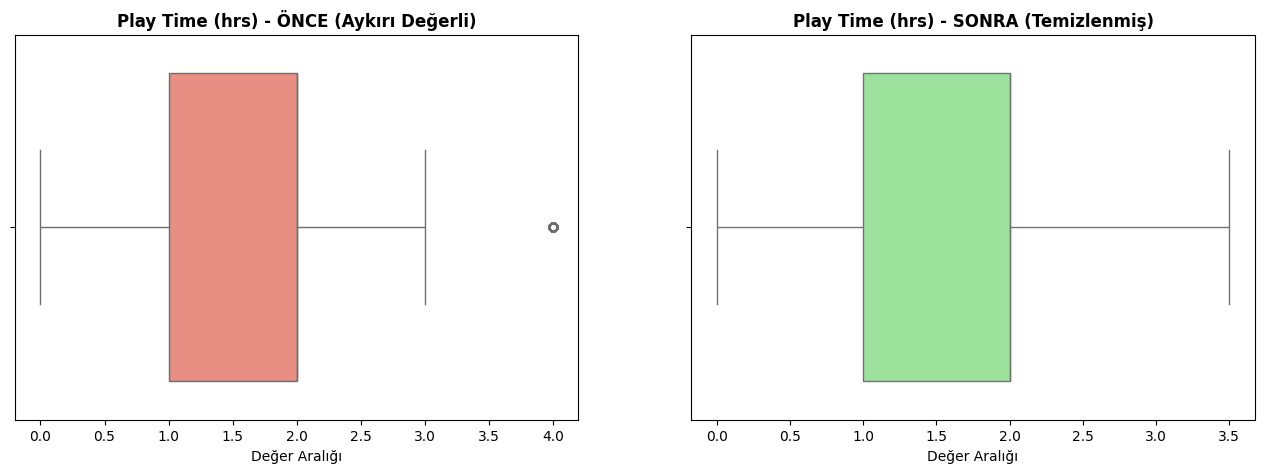

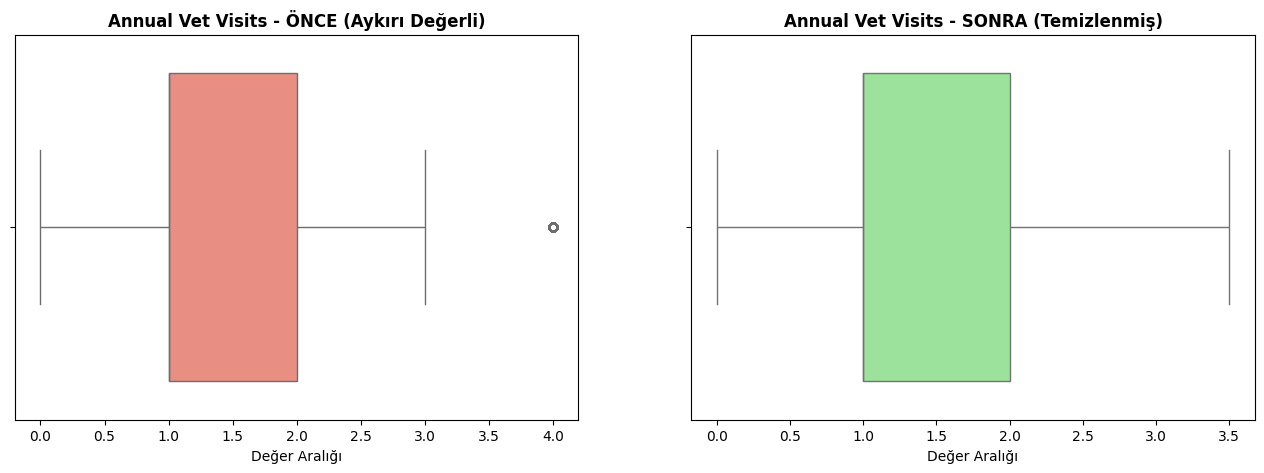

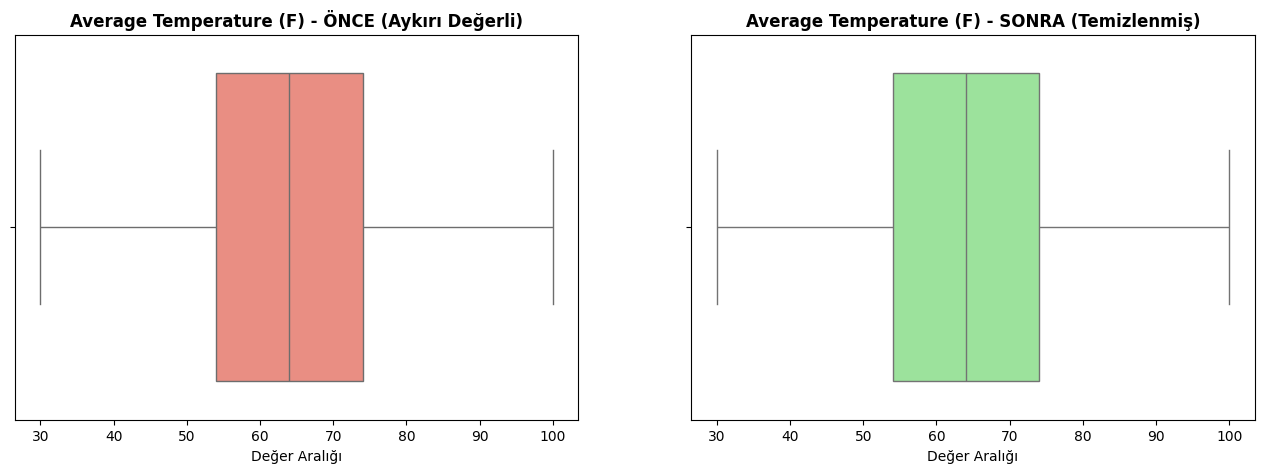

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Hazırlık: Sayısal Sütunları Otomatik Seç
# (Eğer elinde hazır bir liste varsa onu da kullanabilirsin)
sayisal_features = X_train.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Görselleştirme için verinin işlem görmemiş kopyasını alalım
X_train_before = X_train.copy()

# ---------------------------------------------------------
# 2. AYKIRI DEĞER TESPİT FONKSİYONU (Raporlama İçin)
# ---------------------------------------------------------
def detect_outliers_count(df, col_name):
    Q1 = df[col_name].quantile(0.25)
    Q3 = df[col_name].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return ((df[col_name] < lower) | (df[col_name] > upper)).sum()

print("--- İŞLEM ÖNCESİ AYKIRI DEĞER SAYILARI ---")
for c in sayisal_features:
    print(f"{c:<20}: {detect_outliers_count(X_train, c)}")

# ---------------------------------------------------------
# 3. HESAPLAMA VE BASKILAMA (CLIPPING)
# ---------------------------------------------------------
limitler = {}

# Limitleri SADECE X_train üzerinden hesaplıyoruz!
for col in sayisal_features:
    Q1 = X_train[col].quantile(0.25)
    Q3 = X_train[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Limitleri sözlüğe kaydet (İleride lazım olabilir)
    limitler[col] = (lower_limit, upper_limit)

    # Baskılama İşlemi (Train, Val, Test hepsine uygulanır)
    X_train[col] = X_train[col].clip(lower_limit, upper_limit)

    # Eğer X_val ve X_test tanımlıysa onları da aynı limitlerle baskıla
    if 'X_val' in locals():
        X_val[col] = X_val[col].clip(lower_limit, upper_limit)
    if 'X_test' in locals():
        X_test[col] = X_test[col].clip(lower_limit, upper_limit)

print("\n✅ Aykırı değerler baskılandı (Capped).")
print("-" * 40)

print("--- İŞLEM SONRASI AYKIRI DEĞER SAYILARI ---")
for c in sayisal_features:
    print(f"{c:<20}: {detect_outliers_count(X_train, c)}")

# ---------------------------------------------------------
# 4. GÖRSELLEŞTİRME (ÖNCESİ vs SONRASI Kutu Grafikleri)
# ---------------------------------------------------------
print("\n📊 DEĞİŞİM GRAFİKLERİ ÇİZİLİYOR...")

for col in sayisal_features:
    fig, axes = plt.subplots(1, 2, figsize=(16, 5))

    # SOL GRAFİK: İşlem ÖNCESİ (Orijinal)
    # Siyah noktalar aykırı değerleri gösterir
    sns.boxplot(x=X_train_before[col], ax=axes[0], color='salmon')
    axes[0].set_title(f"{col} - ÖNCE (Aykırı Değerli)", fontweight='bold')
    axes[0].set_xlabel("Değer Aralığı")

    # SAĞ GRAFİK: İşlem SONRASI (Baskılanmış)
    # Noktaların sınırlara yapıştığını görmelisin
    sns.boxplot(x=X_train[col], ax=axes[1], color='lightgreen')
    axes[1].set_title(f"{col} - SONRA (Temizlenmiş)", fontweight='bold')
    axes[1].set_xlabel("Değer Aralığı")

    plt.show()

 ÖLÇEKLEMEDEN ÖNCE
               Age  Weight (lbs)  Daily Walk Distance (miles)  Hours of Sleep  \
count  5806.000000   5806.000000                  5806.000000     5806.000000   
mean      7.034964     50.116776                     2.515157       11.002756   
std       3.729804     14.598637                     1.233621        1.450056   
min       1.000000     10.000000                     0.500000        8.000000   
25%       4.000000     40.000000                     2.000000       10.000000   
50%       7.000000     50.000000                     3.000000       11.000000   
75%      10.000000     60.000000                     3.000000       12.000000   
max      13.000000     90.000000                     4.500000       14.000000   

       Play Time (hrs)  Annual Vet Visits  Average Temperature (F)  
count      5806.000000        5806.000000              5806.000000  
mean          1.528074           1.434378                64.416810  
std           0.941934           1.068095   

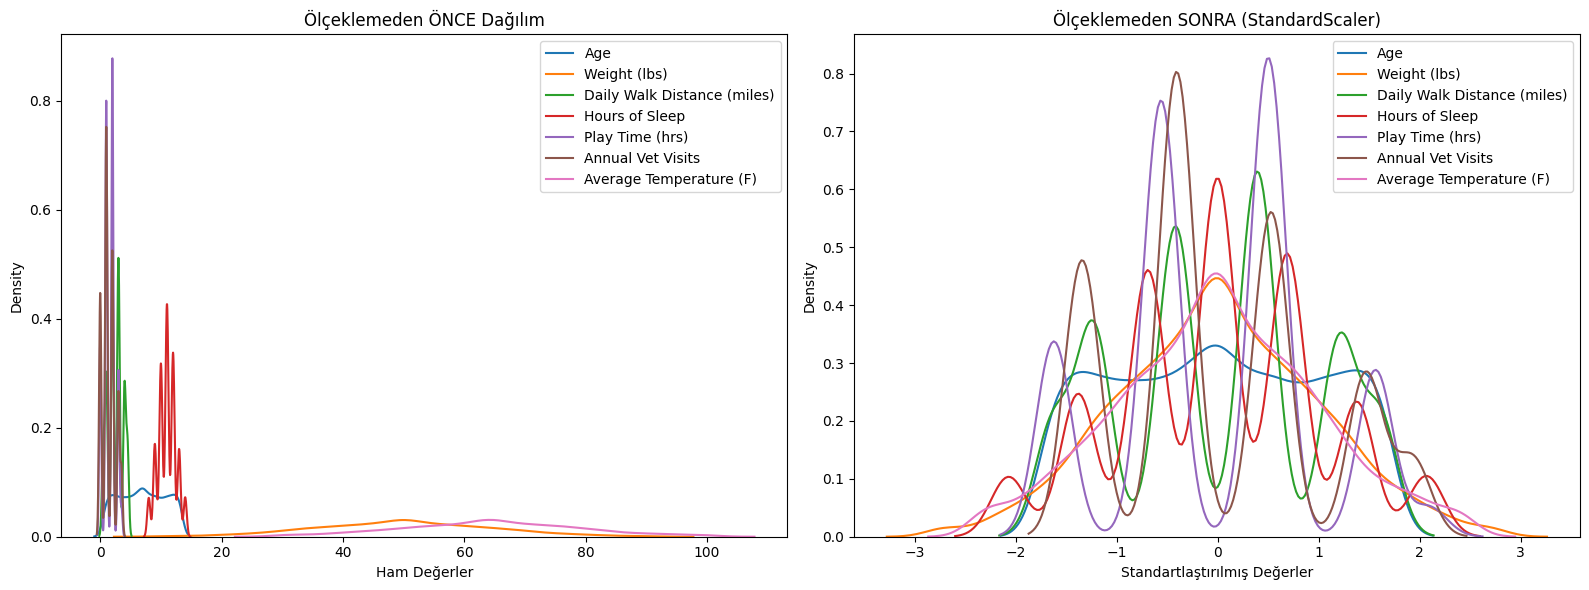

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. ADIM: Bu satırı mutlaka EN BAŞA eklemelisin ---
# Veri değişmeden yedeğini alıyoruz ki grafikte 'Önceki' halini gösterebilelim.
X_train_onceki = X_train[sayisal_features].copy()
# ------------------------------------------------------

print(" ÖLÇEKLEMEDEN ÖNCE")
print(X_train[sayisal_features].describe())
print("\n" * 3)

scaler = StandardScaler()

# Senin orijinal kodların (dokunulmadı)
X_train[sayisal_features] = scaler.fit_transform(X_train[sayisal_features])
X_val[sayisal_features] = scaler.transform(X_val[sayisal_features])
X_test[sayisal_features] = scaler.transform(X_test[sayisal_features])

print("ÖLÇEKLEMEDEN SONRA")
print(X_train[sayisal_features].describe())

# --- 2. ADIM: Grafik Çizdirme Kodu ---
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 6))

# Soldaki Grafik: Ölçeklemeden ÖNCE (Yedeklediğimiz veriyi kullanıyor)
ax1.set_title('Ölçeklemeden ÖNCE Dağılım')
for col in sayisal_features:
    sns.kdeplot(X_train_onceki[col], ax=ax1, label=col)
ax1.set_xlabel('Ham Değerler')
ax1.legend()

# Sağdaki Grafik: Ölçeklemeden SONRA (Dönüştürülmüş veriyi kullanıyor)
ax2.set_title('Ölçeklemeden SONRA (StandardScaler)')
for col in sayisal_features:
    sns.kdeplot(X_train[sayisal_features][col], ax=ax2, label=col)
ax2.set_xlabel('Standartlaştırılmış Değerler')
ax2.legend()

plt.tight_layout()
plt.show()

Encoding tamamlandı.
------------------------------
X_train'in Yeni Yapısı (İlk 5 Satır):
           Age  Weight (lbs)  Daily Walk Distance (miles)  Hours of Sleep  \
8415 -0.009375      0.882571                    -1.633671       -1.381276   
6717 -0.277509      0.334527                    -0.417633       -0.691589   
5060  1.063160      1.293604                     0.393058       -1.381276   
8812 -1.350043      0.814066                     1.609096       -0.691589   
1045 -1.081910     -0.282022                     1.609096       -1.381276   

      Play Time (hrs)  Annual Vet Visits  Average Temperature (F)  \
8415        -0.560676          -0.406720                -1.250964   
6717        -1.622413           1.465934                -0.028312   
5060         0.501061          -0.406720                 0.039613   
8812        -0.560676          -1.343047                 0.650939   
1045        -0.560676           1.465934                -0.300012   

      Breed_Beagle  Breed_Boxer 

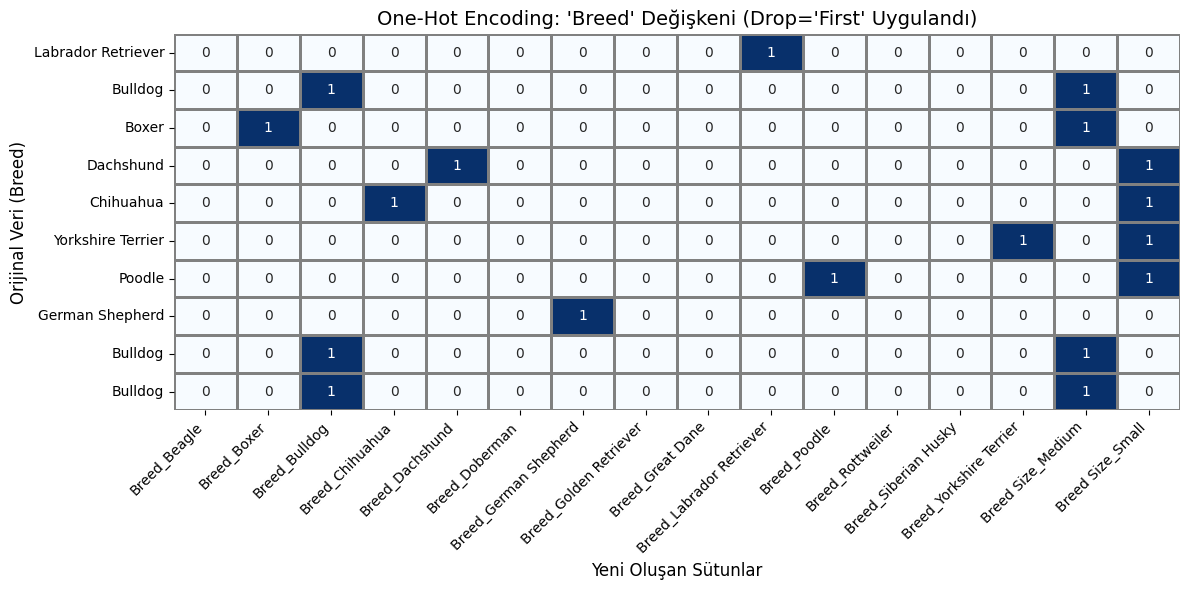

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

# --- 1. ENCODING İŞLEMİ ---

# Encoder tanımlanıyor (Drop='first' olduğu için ilk sınıflar atılacak)
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='first')

# Encoder fit ediliyor
encoder.fit(X_train[kategorik_features])

# Yeni sütun isimleri alınıyor
encoded_cols = encoder.get_feature_names_out(kategorik_features)

# X_train dönüştürülüyor
df_train_encoded = pd.DataFrame(
    encoder.transform(X_train[kategorik_features]),
    columns=encoded_cols,
    index=X_train.index
)
# Orijinal sütunları saklayıp (işlem hatasız olsun diye) düşürüyoruz ve yenilerini ekliyoruz
X_train = X_train.drop(kategorik_features, axis=1)
X_train = pd.concat([X_train, df_train_encoded], axis=1)

# X_val dönüştürülüyor
df_val_encoded = pd.DataFrame(
    encoder.transform(X_val[kategorik_features]),
    columns=encoded_cols,
    index=X_val.index
)
X_val = X_val.drop(kategorik_features, axis=1)
X_val = pd.concat([X_val, df_val_encoded], axis=1)

# X_test dönüştürülüyor
df_test_encoded = pd.DataFrame(
    encoder.transform(X_test[kategorik_features]),
    columns=encoded_cols,
    index=X_test.index
)
X_test = X_test.drop(kategorik_features, axis=1)
X_test = pd.concat([X_test, df_test_encoded], axis=1)

print("Encoding tamamlandı.")
print("-" * 30)
print("X_train'in Yeni Yapısı (İlk 5 Satır):")
print(X_train.head())
print("-" * 30)


# --- 2. GÖRSELLEŞTİRME KODU (HEATMAP) ---

# Grafiğin temiz görünmesi için rastgele 10 örnek seçelim
sample_size = 10
sample_indices = X_train.sample(sample_size, random_state=42).index

# Sadece encode edilmiş sütunları çekelim
encoded_sample = X_train.loc[sample_indices, encoded_cols]

# Encoder yardımıyla bu 0 ve 1'lerin orijinalde ne olduğunu bulalım (Y ekseni için)
original_values = encoder.inverse_transform(encoded_sample)

# İlk kategorik değişkeni seçelim (Örn: 'Seasons')
target_feature_name = kategorik_features[0]

# Sadece o değişkene ait encode edilmiş sütunları filtreleyelim
target_encoded_cols = [col for col in encoded_cols if target_feature_name in col]
plot_data = encoded_sample[target_encoded_cols]

# Y ekseni etiketlerini (Orijinal isimleri) ayarlayalım
y_labels = original_values[:, 0]

# Çizim Başlıyor
plt.figure(figsize=(12, 6)) # Genişliği biraz artırdık

# Heatmap Oluşturma
sns.heatmap(plot_data, annot=True, cmap="Blues", cbar=False,
            linewidths=1, linecolor='gray', fmt='g')

# Eksen İsimlendirmeleri
plt.yticks(ticks=[i + 0.5 for i in range(len(y_labels))], labels=y_labels, rotation=0)

# İŞTE DÜZELTME BURADA: rotation=45 ve ha='right' (yazıları sağa yatırır)
plt.xticks(rotation=45, ha='right')

plt.title(f"One-Hot Encoding: '{target_feature_name}' Değişkeni (Drop='First' Uygulandı)", fontsize=14)
plt.ylabel(f"Orijinal Veri ({target_feature_name})", fontsize=12)
plt.xlabel("Yeni Oluşan Sütunlar", fontsize=12)

plt.tight_layout() # Yazıların kesilmesini engeller
plt.show()

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import (
    classification_report,
    roc_auc_score,
    confusion_matrix,
    make_scorer,
    f1_score
)
from sklearn.model_selection import GridSearchCV


In [ ]:
hedef_map = {'Yes': 0, 'No': 1}

y_train_encoded = y_train.map(hedef_map)
y_val_encoded = y_val.map(hedef_map)
y_test_encoded = y_test.map(hedef_map)

print("y_train 'Yes'/'No' dağılımı:")
print(y_train.value_counts())
print("\ny_train_encoded (0/1) dağılımı:")
print(y_train_encoded.value_counts())

y_train 'Yes'/'No' dağılımı:
Healthy
Yes    4306
No     1500
Name: count, dtype: int64

y_train_encoded (0/1) dağılımı:
Healthy
0    4306
1    1500
Name: count, dtype: int64


In [ ]:
degerler = y_train_encoded.value_counts()

scale_pos_weight_degeri = degerler[0] / degerler[1]

print(f"Hesaplanan XGBoost scale_pos_weight: {scale_pos_weight_degeri:.2f}")

Hesaplanan XGBoost scale_pos_weight: 2.87


HAM: Logistic Regression
              precision    recall  f1-score   support

          No       0.57      0.80      0.67       500
         Yes       0.92      0.79      0.85      1436

    accuracy                           0.79      1936
   macro avg       0.75      0.80      0.76      1936
weighted avg       0.83      0.79      0.80      1936

ROC-AUC Skoru: 0.8830


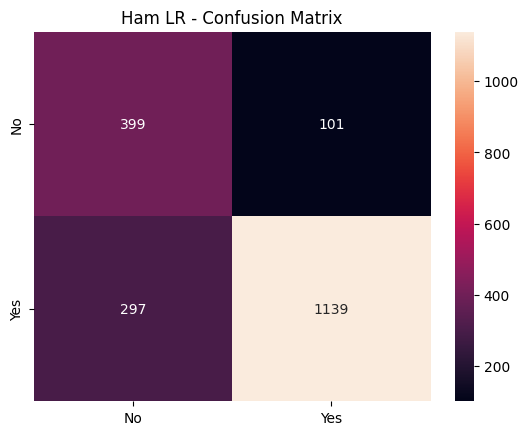

In [ ]:
print("HAM: Logistic Regression")
model_lr_ham = LogisticRegression(
    class_weight='balanced',
    max_iter=1000,
    random_state=42
)
model_lr_ham.fit(X_train, y_train)

y_pred_lr_ham = model_lr_ham.predict(X_val)

y_proba_lr_ham = model_lr_ham.predict_proba(X_val)[:, 0]

print(classification_report(y_val, y_pred_lr_ham, target_names=['No', 'Yes']))
print(f"ROC-AUC Skoru: {roc_auc_score(y_val_encoded, y_proba_lr_ham):.4f}")

# Confusion Matrix
cm = confusion_matrix(y_val, y_pred_lr_ham, labels=['No', 'Yes'])
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title("Ham LR - Confusion Matrix")
plt.show()

--- HAM: Random Forest ---
              precision    recall  f1-score   support

          No       0.86      0.58      0.69       500
         Yes       0.87      0.97      0.91      1436

    accuracy                           0.87      1936
   macro avg       0.86      0.77      0.80      1936
weighted avg       0.86      0.87      0.86      1936

ROC-AUC Skoru: 0.9297


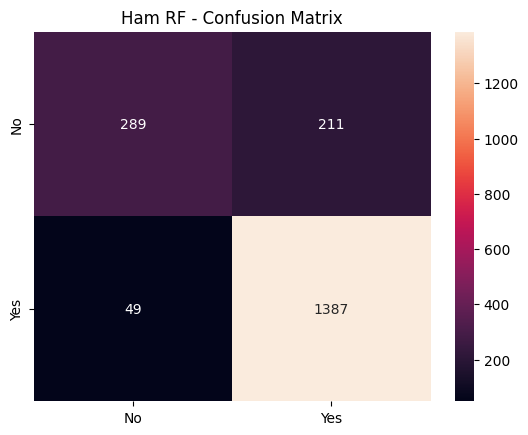

In [ ]:
print("--- HAM: Random Forest ---")
model_rf_ham = RandomForestClassifier(
    class_weight='balanced',
    random_state=42
)
model_rf_ham.fit(X_train, y_train)

y_pred_rf_ham = model_rf_ham.predict(X_val)

y_proba_rf_ham = model_rf_ham.predict_proba(X_val)[:, 0]

print(classification_report(y_val, y_pred_rf_ham, target_names=['No', 'Yes']))
print(f"ROC-AUC Skoru: {roc_auc_score(y_val_encoded, y_proba_rf_ham):.4f}")

# Confusion Matrix
cm = confusion_matrix(y_val, y_pred_rf_ham, labels=['No', 'Yes'])
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title("Ham RF - Confusion Matrix")
plt.show()

--- HAM: XGBoost ---
              precision    recall  f1-score   support

     Yes (0)       0.92      0.90      0.91      1436
      No (1)       0.72      0.78      0.75       500

    accuracy                           0.87      1936
   macro avg       0.82      0.84      0.83      1936
weighted avg       0.87      0.87      0.87      1936

ROC-AUC Skoru: 0.9367


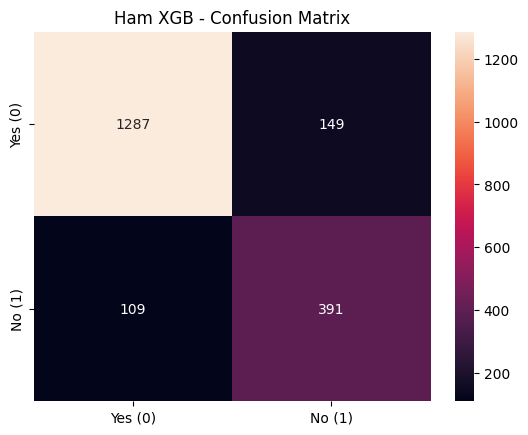

In [ ]:
print("--- HAM: XGBoost ---")
model_xgb_ham = XGBClassifier(
    scale_pos_weight=scale_pos_weight_degeri,
    eval_metric='logloss',
    random_state=42
)
model_xgb_ham.fit(X_train, y_train_encoded)

y_pred_xgb_ham = model_xgb_ham.predict(X_val)

y_proba_xgb_ham = model_xgb_ham.predict_proba(X_val)[:, 1]

print(classification_report(y_val_encoded, y_pred_xgb_ham, target_names=['Yes (0)', 'No (1)']))
print(f"ROC-AUC Skoru: {roc_auc_score(y_val_encoded, y_proba_xgb_ham):.4f}")

# Confusion Matrix
cm = confusion_matrix(y_val_encoded, y_pred_xgb_ham)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['Yes (0)', 'No (1)'], yticklabels=['Yes (0)', 'No (1)'])
plt.title("Ham XGB - Confusion Matrix")
plt.show()


--- HAM Modellerin ROC Eğrisi Karşılaştırması (Validasyon Seti) ---


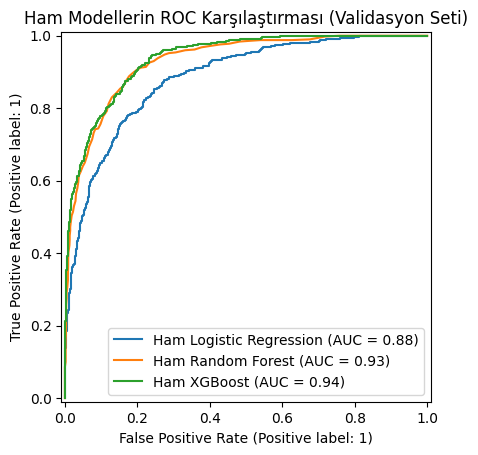

In [ ]:
# Gerekli kütüphaneler (eğer daha önce import edilmediyse)
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

print("\n--- HAM Modellerin ROC Eğrisi Karşılaştırması (Validasyon Seti) ---")

# 1. Bir grafik alanı (axes) oluştur
ax = plt.gca()

# 2. Ham LR modelinin eğrisini çizdir
# (y_proba_lr_ham'ın Hücre 2.1'de hesaplandığını varsayıyoruz)
RocCurveDisplay.from_predictions(
    y_val_encoded,
    y_proba_lr_ham,
    name='Ham Logistic Regression',
    ax=ax
)

# 3. Ham RF modelinin eğrisini çizdir
# (y_proba_rf_ham'ın Hücre 2.2'de hesaplandığını varsayıyoruz)
RocCurveDisplay.from_predictions(
    y_val_encoded,
    y_proba_rf_ham,
    name='Ham Random Forest',
    ax=ax
)

# 4. Ham XGB modelinin eğrisini çizdir
# (y_proba_xgb_ham'ın Hücre 2.3'te hesaplandığını varsayıyoruz)
RocCurveDisplay.from_predictions(
    y_val_encoded,
    y_proba_xgb_ham,
    name='Ham XGBoost',
    ax=ax
)

# Grafiği göster
plt.title("Ham Modellerin ROC Karşılaştırması (Validasyon Seti)")
plt.show()

Optimizasyon Başlıyor: Logistic Regression
LR En İyi Ayarlar: {'C': 10, 'solver': 'lbfgs'}
--- OPTİMİZE: Logistic Regression ---
              precision    recall  f1-score   support

          No       0.57      0.80      0.67       500
         Yes       0.92      0.79      0.85      1436

    accuracy                           0.79      1936
   macro avg       0.75      0.80      0.76      1936
weighted avg       0.83      0.79      0.80      1936

ROC-AUC Skoru: 0.8827

Optimize LR - Confusion Matrix:


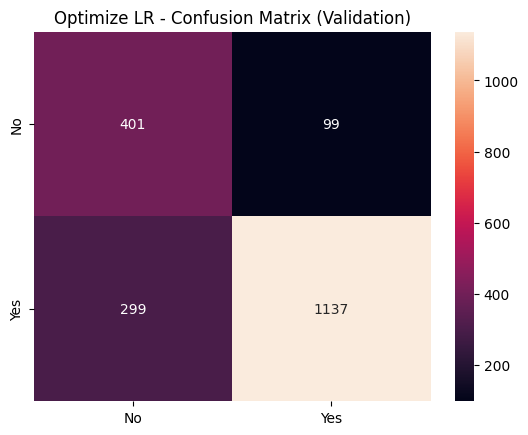

In [ ]:
print("Optimizasyon Başlıyor: Logistic Regression")
param_grid_lr = {
    "C": [1,10,50,100],
    "solver": ["liblinear", "lbfgs"]
}

# Not: LR modeli zaten 'balanced' ayarıyla tanımlanmıştı
grid_lr = GridSearchCV(
    LogisticRegression(class_weight='balanced', max_iter=2000, random_state=42),
    param_grid_lr,
    cv=3,
    scoring="f1_macro", # 'No' ve 'Yes' F1 ortalaması
    n_jobs=-1
)

# 'Yes'/'No' verisiyle eğit
grid_lr.fit(X_train, y_train)

best_model_lr = grid_lr.best_estimator_
print(f"LR En İyi Ayarlar: {grid_lr.best_params_}")

print("--- OPTİMİZE: Logistic Regression ---")
y_pred_lr_opt = best_model_lr.predict(X_val)
y_proba_lr_opt = best_model_lr.predict_proba(X_val)[:, 0] # 'No' olasılığı

print(classification_report(y_val, y_pred_lr_opt, target_names=['No', 'Yes']))
print(f"ROC-AUC Skoru: {roc_auc_score(y_val_encoded, y_proba_lr_opt):.4f}")

print("\nOptimize LR - Confusion Matrix:")
cm_lr_opt = confusion_matrix(y_val, y_pred_lr_opt, labels=['No', 'Yes'])
sns.heatmap(cm_lr_opt, annot=True, fmt='d', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title("Optimize LR - Confusion Matrix (Validation)")
plt.show()

Optimizasyon Başlıyor: Random Forest
RF En İyi Ayarlar: {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 100}
--- OPTİMİZE: Random Forest ---
              precision    recall  f1-score   support

          No       0.62      0.88      0.72       500
         Yes       0.95      0.81      0.87      1436

    accuracy                           0.83      1936
   macro avg       0.78      0.84      0.80      1936
weighted avg       0.86      0.83      0.84      1936

ROC-AUC Skoru: 0.9237

Optimize RF - Confusion Matrix:


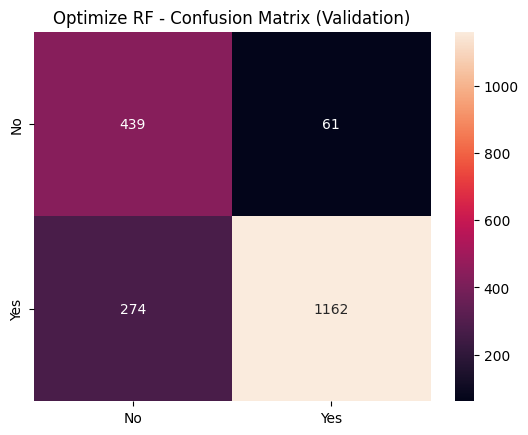

In [ ]:
print("Optimizasyon Başlıyor: Random Forest")
param_grid_rf = {
    "n_estimators": [100, 300],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2, 5]
}

grid_rf = GridSearchCV(
    RandomForestClassifier(class_weight='balanced', random_state=42),
    param_grid_rf,
    cv=3,
    scoring="f1_macro",
    n_jobs=-1
)

# 'Yes'/'No' verisiyle eğit
grid_rf.fit(X_train, y_train)

best_model_rf = grid_rf.best_estimator_
print(f"RF En İyi Ayarlar: {grid_rf.best_params_}")

print("--- OPTİMİZE: Random Forest ---")
y_pred_rf_opt = best_model_rf.predict(X_val)
y_proba_rf_opt = best_model_rf.predict_proba(X_val)[:, 0] # 'No' olasılığı

print(classification_report(y_val, y_pred_rf_opt, target_names=['No', 'Yes']))
print(f"ROC-AUC Skoru: {roc_auc_score(y_val_encoded, y_proba_rf_opt):.4f}")

print("\nOptimize RF - Confusion Matrix:")
cm_rf_opt = confusion_matrix(y_val, y_pred_rf_opt, labels=['No', 'Yes'])
sns.heatmap(cm_rf_opt, annot=True, fmt='d', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title("Optimize RF - Confusion Matrix (Validation)")
plt.show()

Optimizasyon Başlıyor: XGBoost
XGB En İyi Ayarlar: {'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 400, 'subsample': 0.7}
--- OPTİMİZE: XGBoost ---
              precision    recall  f1-score   support

     Yes (0)       0.94      0.88      0.91      1436
      No (1)       0.70      0.84      0.76       500

    accuracy                           0.87      1936
   macro avg       0.82      0.86      0.83      1936
weighted avg       0.88      0.87      0.87      1936

ROC-AUC Skoru: 0.9467

Optimize XGB - Confusion Matrix:


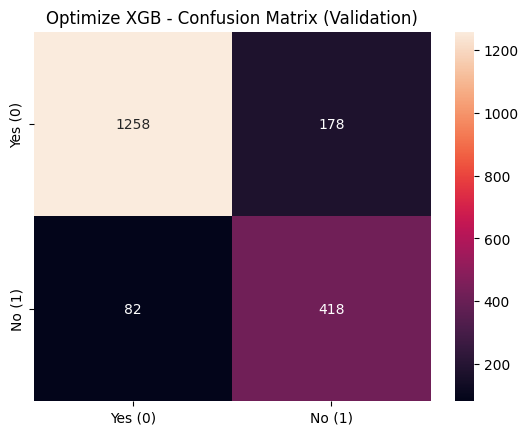

In [ ]:
print("Optimizasyon Başlıyor: XGBoost")
param_grid_xgb = {
    "n_estimators": [200, 400],
    "learning_rate": [0.01, 0.1],
    "max_depth": [3, 5, 7],
    "subsample": [0.7, 1],
    "colsample_bytree": [0.7, 1]
}

grid_xgb = GridSearchCV(
    XGBClassifier(scale_pos_weight=scale_pos_weight_degeri, eval_metric='logloss', random_state=42),
    param_grid_xgb,
    cv=3,
    scoring="f1_macro",
    n_jobs=-1
)

# 0/1 (encoded) verisiyle eğit
grid_xgb.fit(X_train, y_train_encoded)

best_model_xgb = grid_xgb.best_estimator_
print(f"XGB En İyi Ayarlar: {grid_xgb.best_params_}")

print("--- OPTİMİZE: XGBoost ---")
y_pred_xgb_opt = best_model_xgb.predict(X_val)
y_proba_xgb_opt = best_model_xgb.predict_proba(X_val)[:, 1] # 'No' (1) olasılığı

print(classification_report(y_val_encoded, y_pred_xgb_opt, target_names=['Yes (0)', 'No (1)']))
print(f"ROC-AUC Skoru: {roc_auc_score(y_val_encoded, y_proba_xgb_opt):.4f}")

print("\nOptimize XGB - Confusion Matrix:")
cm_xgb_opt = confusion_matrix(y_val_encoded, y_pred_xgb_opt)
sns.heatmap(cm_xgb_opt, annot=True, fmt='d', xticklabels=['Yes (0)', 'No (1)'], yticklabels=['Yes (0)', 'No (1)'])
plt.title("Optimize XGB - Confusion Matrix (Validation)")
plt.show()

In [ ]:
!pip install shap

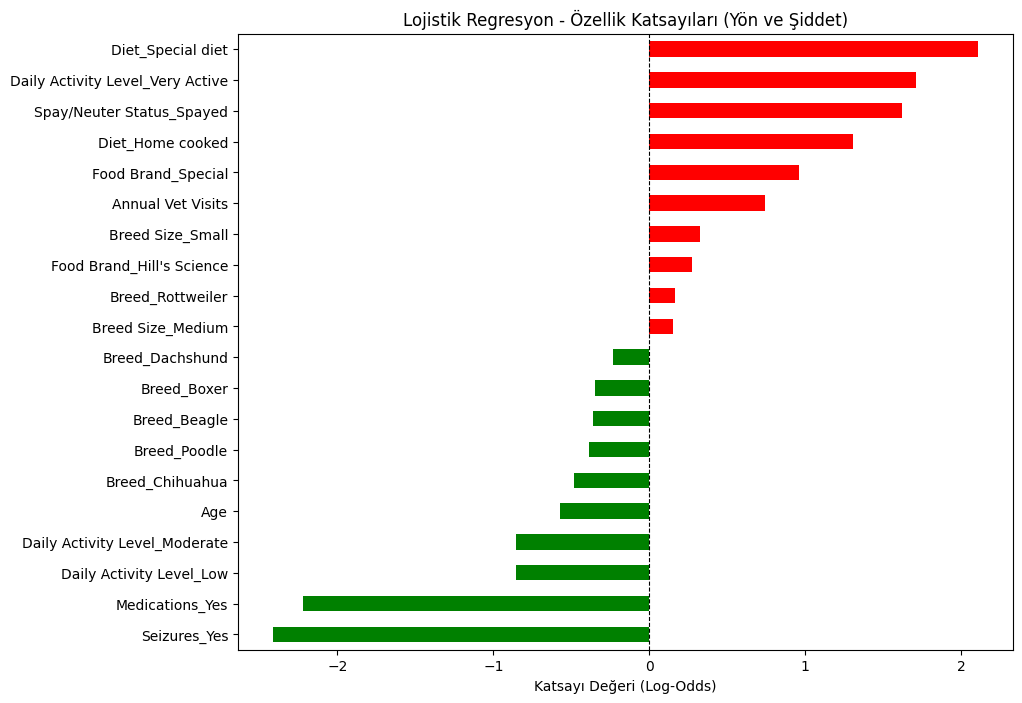

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Özellik isimlerini al
feature_names = X_train.columns

# Katsayıları al ve bir Seriye dönüştür
lr_coefs = pd.Series(best_model_lr.coef_[0], index=feature_names)

# Mutlak değere göre değil, büyüklüğe göre sırala (Yönü görmek için)
lr_coefs_sorted = lr_coefs.sort_values()

# En etkili 20 özelliği seç (Negatif ve Pozitif uçlar)
top_features = pd.concat([lr_coefs_sorted.head(10), lr_coefs_sorted.tail(10)])

plt.figure(figsize=(10, 8))
colors = ['red' if c > 0 else 'green' for c in top_features.values]
top_features.plot(kind='barh', color=colors)
plt.title("Lojistik Regresyon - Özellik Katsayıları (Yön ve Şiddet)")
plt.xlabel("Katsayı Değeri (Log-Odds)")
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
plt.show()

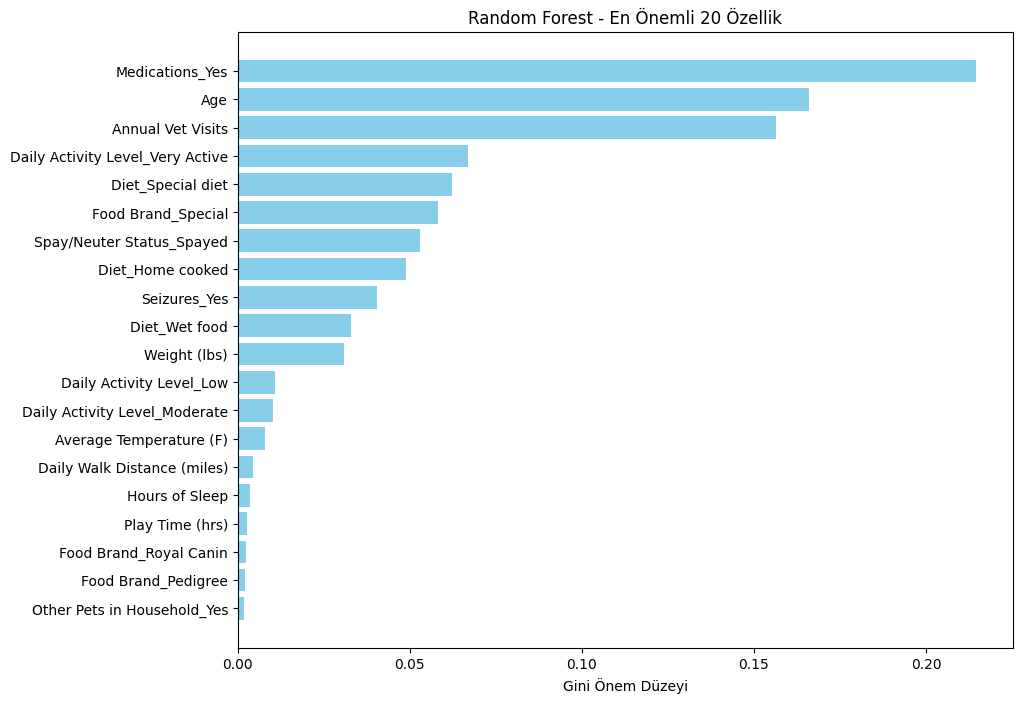

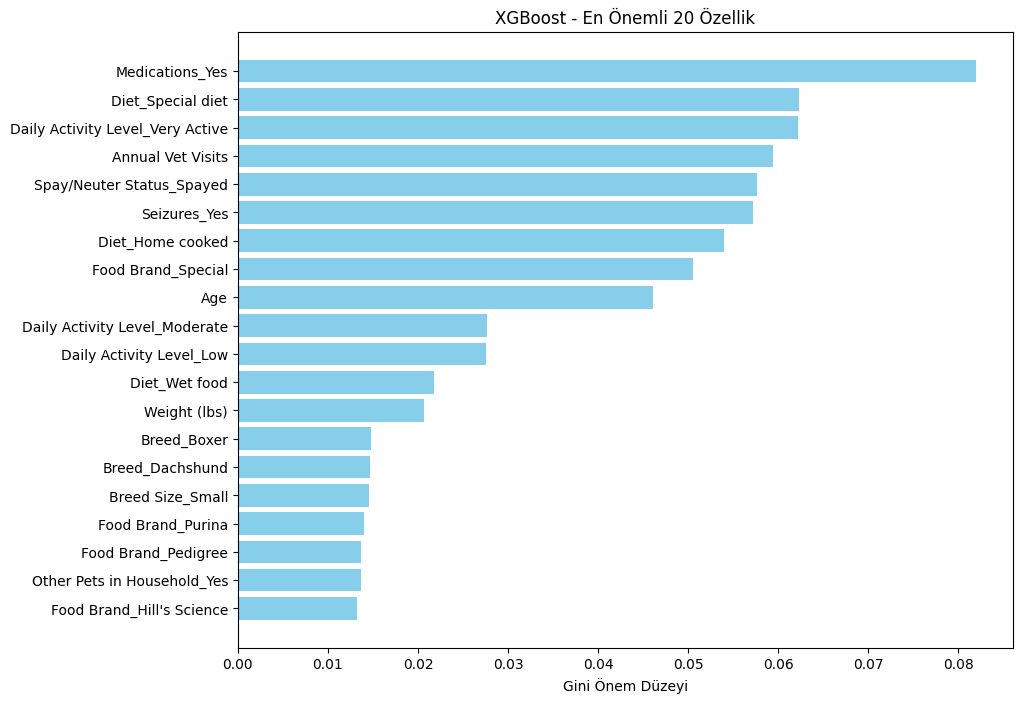

In [ ]:
def plot_feature_importance(model, model_name, features):
    # Önem değerlerini al
    importances = model.feature_importances_
    indices = np.argsort(importances)[-20:] # En önemli 20 özellik

    plt.figure(figsize=(10, 8))
    plt.title(f"{model_name} - En Önemli 20 Özellik")
    plt.barh(range(len(indices)), importances[indices], color='skyblue', align='center')
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.xlabel("Gini Önem Düzeyi")
    plt.show()

# Random Forest için çiz
plot_feature_importance(best_model_rf, "Random Forest", feature_names)

# XGBoost için çiz
plot_feature_importance(best_model_xgb, "XGBoost", feature_names)


--- Optimize Edilmiş Modellerin ROC Eğrisi Karşılaştırması (Validasyon Seti) ---


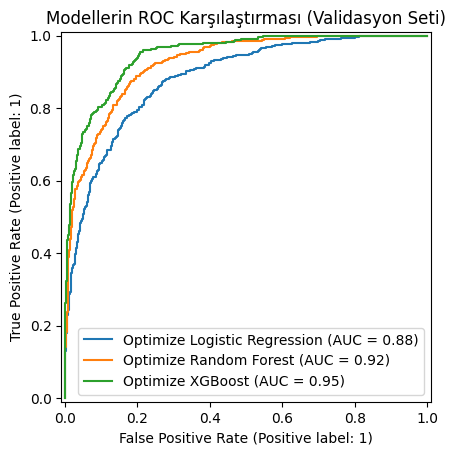

In [ ]:
# Gerekli kütüphaneler (eğer daha önce import edilmediyse)
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

print("\n--- Optimize Edilmiş Modellerin ROC Eğrisi Karşılaştırması (Validasyon Seti) ---")

# 1. Bir grafik alanı (axes) oluştur
ax = plt.gca()

# 2. Optimize LR modelinin eğrisini çizdir
# (y_proba_lr_opt'un Hücre 5.1'de hesaplandığını varsayıyoruz)
RocCurveDisplay.from_predictions(
    y_val_encoded,
    y_proba_lr_opt,
    name='Optimize Logistic Regression',
    ax=ax
)

# 3. Optimize RF modelinin eğrisini çizdir
# (y_proba_rf_opt'un Hücre 5.2'de hesaplandığını varsayıyoruz)
RocCurveDisplay.from_predictions(
    y_val_encoded,
    y_proba_rf_opt,
    name='Optimize Random Forest',
    ax=ax
)

# 4. Optimize XGB modelinin eğrisini çizdir
# (y_proba_xgb_opt'un Hücre 5.3'te hesaplandığını varsayıyoruz)
RocCurveDisplay.from_predictions(
    y_val_encoded,
    y_proba_xgb_opt,
    name='Optimize XGBoost',
    ax=ax
)

# Grafiği göster
plt.title("Modellerin ROC Karşılaştırması (Validasyon Seti)")
plt.show()

In [ ]:
final_model = best_model_xgb
final_model_name = "Optimize XGBoost"
final_y_train = y_train_encoded
final_y_val = y_val_encoded
# --- SEÇİM SONU ---


# Train ve Validation setlerini birleştir
X_train_full = pd.concat([X_train, X_val], axis=0)
y_train_full = pd.concat([final_y_train, final_y_val], axis=0)

print(f"'{final_model_name}' modeli, Train+Val verisiyle (Toplam {len(X_train_full)} satır) yeniden eğitiliyor...")

# Final modelini TÜM veriyle eğit
final_model.fit(X_train_full, y_train_full)

print("Final modeli eğitildi.")

'Optimize XGBoost' modeli, Train+Val verisiyle (Toplam 7742 satır) yeniden eğitiliyor...
Final modeli eğitildi.


--- FİNAL TESTİ: Optimize XGBoost ---

--- FİNAL TEST SETİ Sınıflandırma Raporu ---
              precision    recall  f1-score   support

     Yes (0)       0.96      0.87      0.91      1436
      No (1)       0.70      0.90      0.79       500

    accuracy                           0.87      1936
   macro avg       0.83      0.88      0.85      1936
weighted avg       0.89      0.87      0.88      1936


FİNAL TEST SETİ ROC-AUC Skoru: 0.9463

Final Test Seti Karışıklık Matrisi:


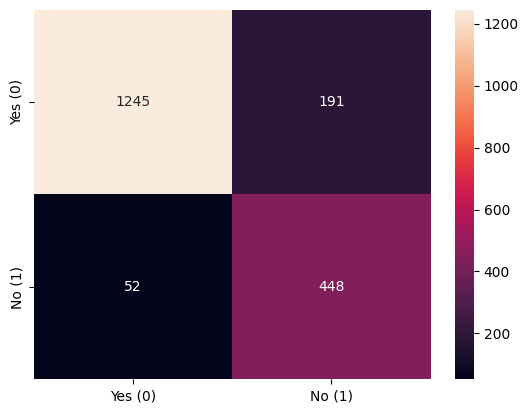


Final Test Seti ROC Eğrisi:


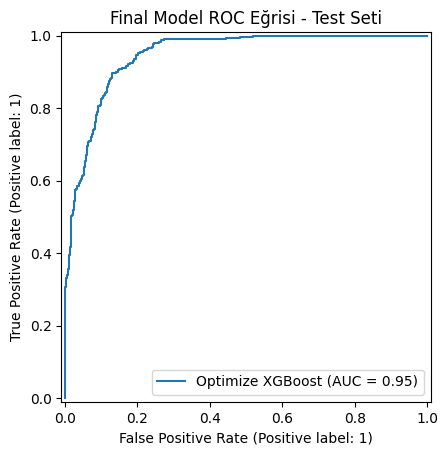

In [ ]:
print(f"--- FİNAL TESTİ: {final_model_name} ---")

# Modelin Test Seti üzerindeki formatını belirle (LR/RF mi, XGB mi?)
if final_model_name.endswith("LR") or final_model_name.endswith("RF"):
    y_test_gercek = y_test
    y_pred_test = final_model.predict(X_test)
    y_proba_test = final_model.predict_proba(X_test)[:, 0] # 'No' olasılığı
    target_names = ['No', 'Yes']
    labels = ['No', 'Yes']

else: # XGBoost kazandıysa
    y_test_gercek = y_test_encoded
    y_pred_test = final_model.predict(X_test)
    y_proba_test = final_model.predict_proba(X_test)[:, 1] # 'No' (1) olasılığı
    target_names = ['Yes (0)', 'No (1)']
    labels = [0, 1]


# Nihai Raporlar
print("\n--- FİNAL TEST SETİ Sınıflandırma Raporu ---")
print(classification_report(y_test_gercek, y_pred_test, target_names=target_names))

print(f"\nFİNAL TEST SETİ ROC-AUC Skoru: {roc_auc_score(y_test_encoded, y_proba_test):.4f}")

# Nihai Confusion Matrix
print("\nFinal Test Seti Karışıklık Matrisi:")
cm = confusion_matrix(y_test_gercek, y_pred_test)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=target_names, yticklabels=target_names)
plt.show()

print("\nFinal Test Seti ROC Eğrisi:")

RocCurveDisplay.from_predictions(
    y_test_gercek,
    y_proba_test,
    name=final_model_name
)

plt.title(f"Final Model ROC Eğrisi - Test Seti")
plt.show()

SHAP analizi hazırlanıyor...


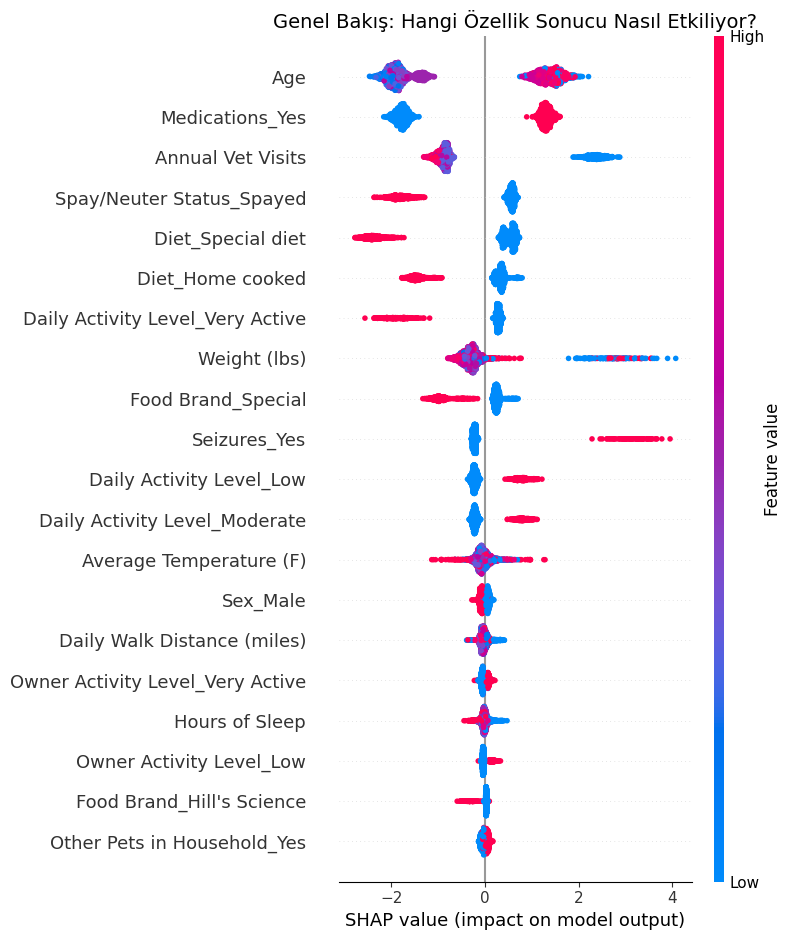

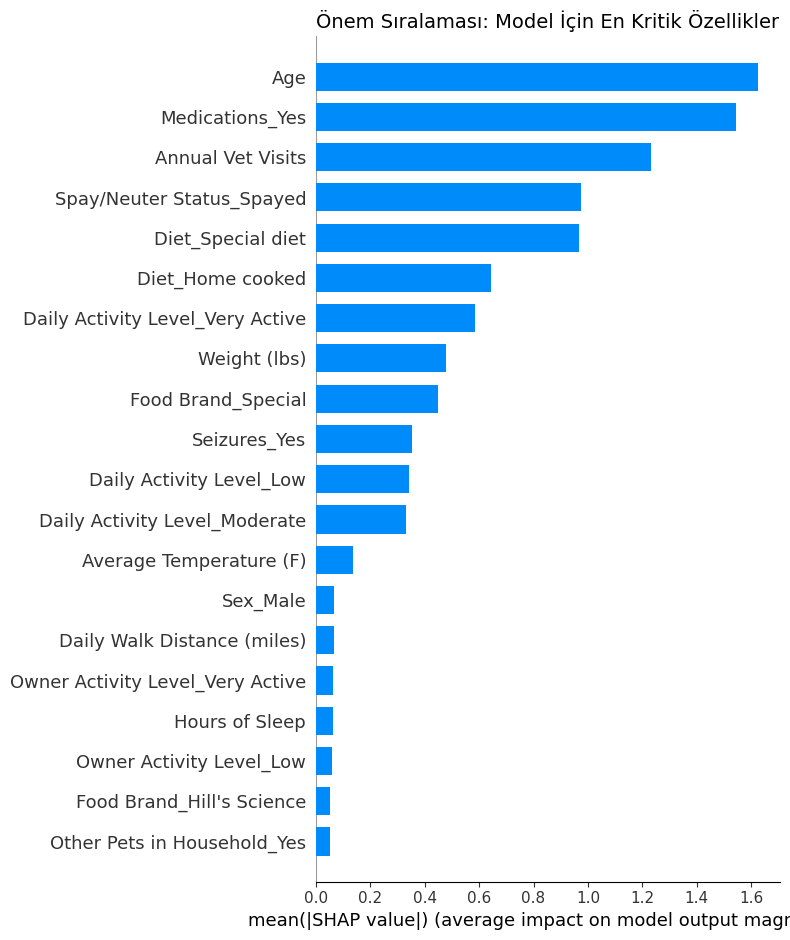


--- İNCELENEN ÖRNEK (Index: 10) ---
Gerçek Durum: Yes (Sağlıklı)
Model Tahmini: Yes (Sağlıklı)
----------------------------------------


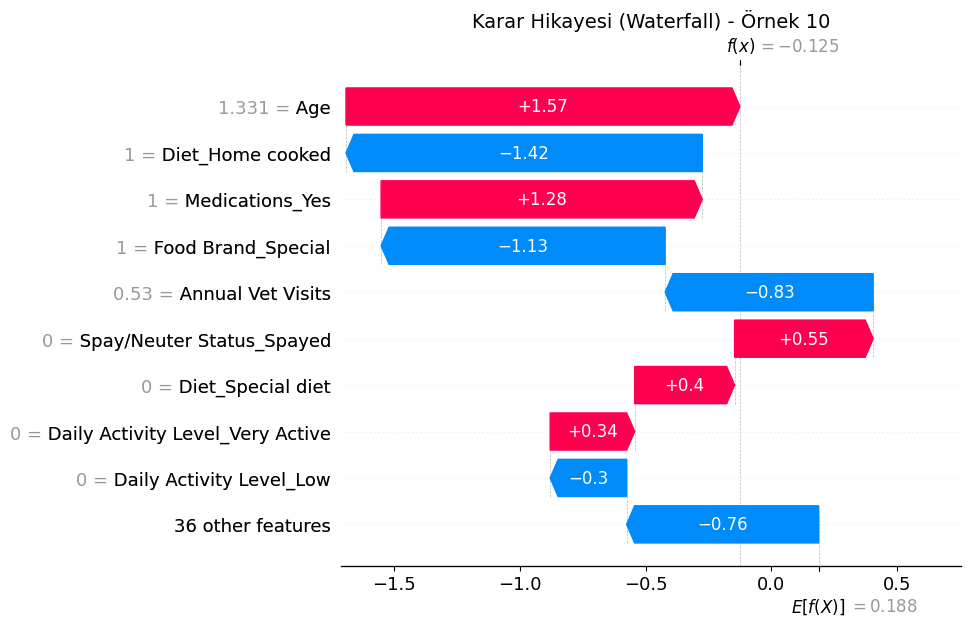

<Figure size 6000x1000 with 0 Axes>

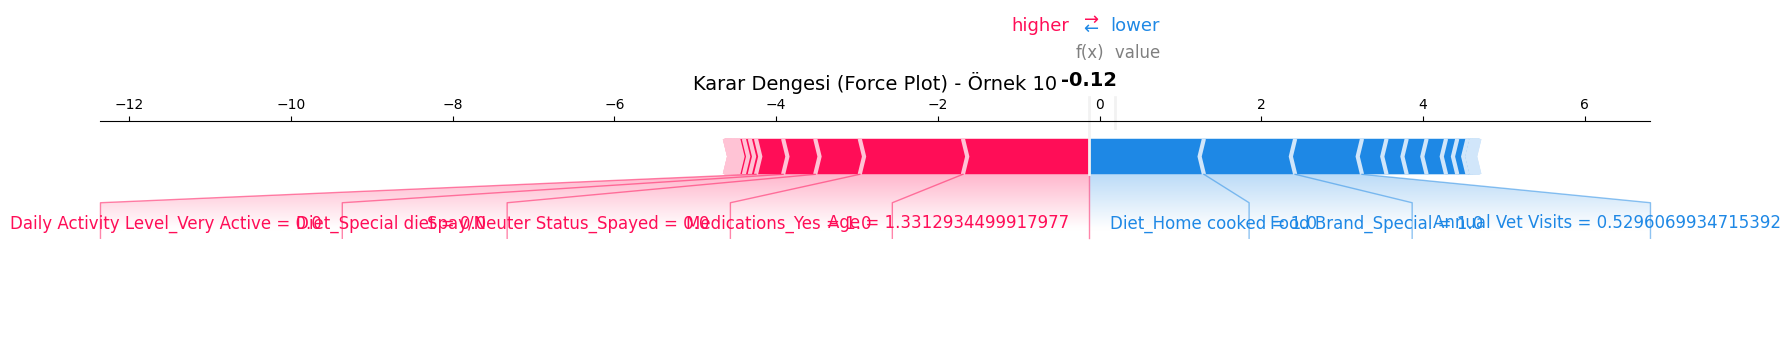

In [ ]:
import shap
import matplotlib.pyplot as plt

# Javascript'i başlat
shap.initjs()

print("SHAP analizi hazırlanıyor...")

# 1. EKSİK OLAN KISIM: Tahminleri burada tekrar yapalım
# Böylece önceki hücrelere bağımlı kalmayız
y_pred_test = best_model_xgb.predict(X_test)

# 2. Explainer Oluşturma
explainer = shap.TreeExplainer(best_model_xgb)

# 3. Değerleri Hesaplama
shap_values = explainer.shap_values(X_test)
shap_explanation = explainer(X_test)

# --- BÖLÜM A: GENEL YORUMLAMA (GLOBAL) ---

# Grafik 1: SHAP Summary Plot
plt.figure(figsize=(12, 8))
plt.title("Genel Bakış: Hangi Özellik Sonucu Nasıl Etkiliyor?", fontsize=14)
shap.summary_plot(shap_values, X_test, show=False)
plt.show()

# Grafik 2: SHAP Bar Plot
plt.figure(figsize=(12, 8))
plt.title("Önem Sıralaması: Model İçin En Kritik Özellikler", fontsize=14)
shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)
plt.show()


# --- BÖLÜM B: TEKİL TAHMİN YORUMLAMA (LOCAL) ---

# İncelemek için rastgele bir örnek seçelim
ornek_index = 10

# Artık y_pred_test tanımlı olduğu için hata vermeyecek
gercek_durum = 'No (Sağlıksız)' if y_test_encoded.iloc[ornek_index] == 1 else 'Yes (Sağlıklı)'
tahmin_durum = 'No (Sağlıksız)' if y_pred_test[ornek_index] == 1 else 'Yes (Sağlıklı)'

print(f"\n--- İNCELENEN ÖRNEK (Index: {ornek_index}) ---")
print(f"Gerçek Durum: {gercek_durum}")
print(f"Model Tahmini: {tahmin_durum}")
print("-" * 40)

# Grafik 3: Waterfall Plot
plt.figure(figsize=(10, 6))
shap.plots.waterfall(shap_explanation[ornek_index], show=False)
plt.title(f"Karar Hikayesi (Waterfall) - Örnek {ornek_index}", fontsize=14)
plt.show()

# Grafik 4: Force Plot
plt.figure(figsize=(60, 10))
shap.plots.force(
    shap_explanation[ornek_index],
    matplotlib=True,
    show=False
)
plt.title(f"Karar Dengesi (Force Plot) - Örnek {ornek_index}", fontsize=14)
plt.show()

Her model 10 kez eğitilip ortalaması alınıyor...
Logistic Regression: Ortalama 0.0645 sn (±0.0166)
Random Forest: Ortalama 0.3317 sn (±0.0152)
XGBoost: Ortalama 0.5673 sn (±0.4346)


/tmp/ipython-input-1791804593.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Eğitim Süresi (sn)", data=df_time, palette="viridis")


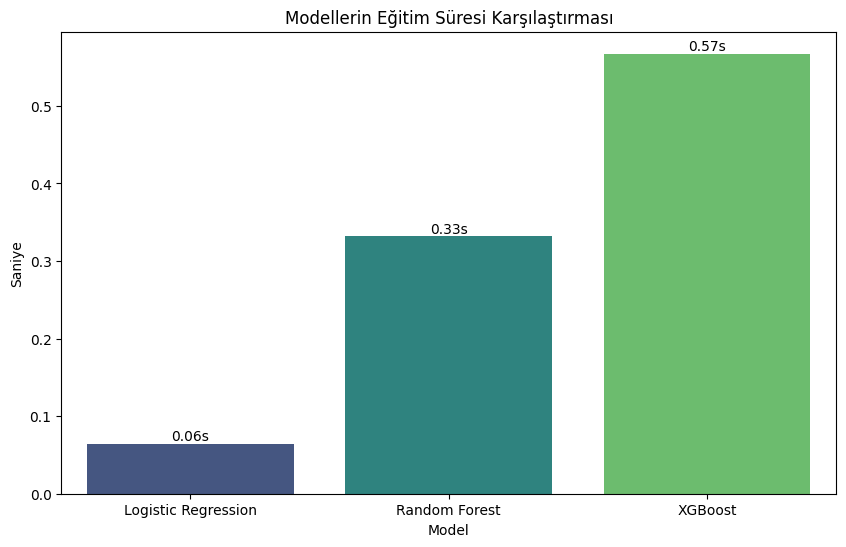

In [ ]:
import time
import numpy as np

models = [
    ("Logistic Regression", best_model_lr, y_train),
    ("Random Forest", best_model_rf, y_train),
    ("XGBoost", best_model_xgb, y_train_encoded)
]

results = []
tekrar_sayisi = 10  # Her modeli 10 kere eğitip ortalamasını alacağız

print(f"Her model {tekrar_sayisi} kez eğitilip ortalaması alınıyor...")

for name, model, y_target in models:
    sureler = []
    for _ in range(tekrar_sayisi):
        start = time.time()
        model.fit(X_train, y_target)
        end = time.time()
        sureler.append(end - start)

    ortalama_sure = np.mean(sureler)
    results.append({"Model": name, "Eğitim Süresi (sn)": ortalama_sure})
    print(f"{name}: Ortalama {ortalama_sure:.4f} sn (±{np.std(sureler):.4f})")

# Sonuçları DataFrame yap ve çiz
df_time = pd.DataFrame(results)

plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="Eğitim Süresi (sn)", data=df_time, palette="viridis")
plt.title("Modellerin Eğitim Süresi Karşılaştırması")
plt.ylabel("Saniye")


# Çubukların üzerine süreleri yazdır
for index, row in df_time.iterrows():
    plt.text(index, row["Eğitim Süresi (sn)"], f'{row["Eğitim Süresi (sn)"]:.2f}s',
             color='black', ha="center", va="bottom")

plt.show()